#imports

In [ ]:
#Done by Gudah
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import utils as np_utils
from matplotlib.colors import LogNorm
from functools import cmp_to_key

np.random.seed(0)  # to have constant results all the time

#Data

In [ ]:
#done by Faith Sang
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#loads and downloads data from the keras data set

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#print how much data we have here
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
#output we have 60000 images of 28 by 28 size of 60000 labels for the train data
#ouput we have 10000 images of 28 by 28 size of 60000 labels for the test data

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize examples

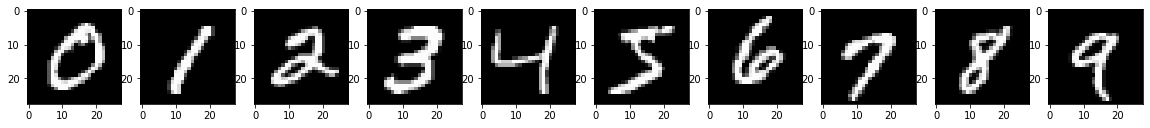

In [ ]:
#Done by Samuel Muthebwa
num_classes= 10
f, ax= plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample= x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
 #ax[i].set_title("Label: {}". format(i), fontsize=16)

In [ ]:
#printing the labels
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train= keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test= keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])
  #output is a vector of size ten and fill the vector with 0 except where the number is filled with 1

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [ ]:
#Done by Faith Sang
#normalize data
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
#Reshape data
x_train=x_train.reshape(x_train.shape[0], -1) #-1 makes in in 1 dimension
x_test=x_test.reshape(x_test.shape[0], -1) #-1 makes in in 1 dimension
print(x_train.shape)
#output is 60000 images and 728 in 1D in staed of the prvious 2D

(60000, 784)


#Create Model-Fully connected Neural Network

In [ ]:
#model where you can keep adding layer after layer
model= Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu') )
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25)) #25% of the neural are going to be activated during training
model.add(Dense(units=10, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train

In [ ]:
batch_size= 512
epochs= 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs )
#expected ouput is for loss to reduce while accuracy increases in every iteration

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.5965 - accuracy: 0.8312
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2175 - accuracy: 0.9366
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1615 - accuracy: 0.9530
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1287 - accuracy: 0.9615
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1053 - accuracy: 0.9685
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0919 - accuracy: 0.9722
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0782 - accuracy: 0.9766
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0670 - accuracy: 0.9795
Epoch 9/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0596 - accuracy: 0.9825
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0510 - accura

#Evaluate

In [ ]:
#Done by Felix Obuya
#check perfomance on that data(test)  i.e Data that the network hasn't seen before
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print("test loss: {}, test accuracy: {} ".format(test_loss, test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9768
test loss: 0.07407403737306595, test accuracy: 0.9768000245094299 


#Predict a classification on some input image

In [ ]:
y_pred= model.predict(x_test) #gives an array of all the predictions
y_pred_classes= np.argmax(y_pred, axis=1) #pick the highest probability and return the index
print(y_pred) #probability of every element of every single class
print(y_pred_classes) #the number of the classification


[[5.18267598e-07 1.28572765e-06 1.66827303e-05 ... 9.99547422e-01
  9.05521688e-07 2.40282188e-05]
 [1.70178140e-07 1.58034964e-04 9.99813974e-01 ... 1.18225024e-07
  3.14463068e-06 1.31682110e-10]
 [5.85295993e-07 9.98876750e-01 2.13306965e-04 ... 7.17335904e-04
  4.19475509e-05 3.38449013e-06]
 ...
 [1.49095747e-09 3.73532760e-09 1.47770229e-09 ... 5.92373794e-07
  1.39768289e-07 3.50587311e-06]
 [7.54030260e-09 1.42212304e-08 4.97194563e-10 ... 2.41151965e-09
  1.21463818e-05 3.35611122e-10]
 [7.07557524e-09 7.92390209e-10 2.86146395e-09 ... 4.84477042e-11
  3.90401544e-10 1.50989943e-10]]
[7 2 1 ... 4 5 6]


#pick a random element from a test data data and make a prediction

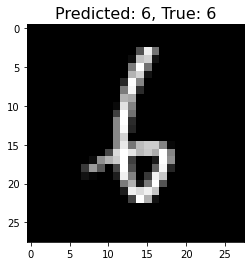

In [ ]:
# single example
random_idx= np.random.choice(len(x_test))
x_sample= x_test[random_idx]
y_true= np.argmax(y_test, axis=1)
y_sample_true= y_true[random_idx]
y_sample_pred_class= y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion matrix(predict how accurate your neural is for every class)

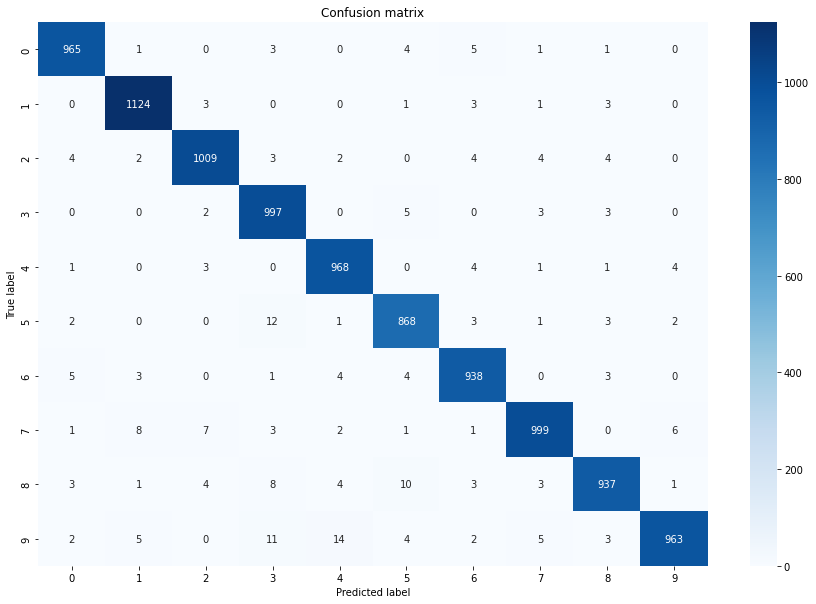

In [ ]:
#Done by Fransicah Mwende
confusion_mtx=confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues' )
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix');
# every column and row is a class for a digit

#Investigate some errors

In [ ]:
errors=(y_pred_classes- y_true !=0)
y_pred_classes_errors= y_pred_classes[errors]
y_pred_errors= y_pred[errors]
y_true_errors= y_true[errors]
x_test_errors= x_test[errors]

In [ ]:
#find errors with the maximum probability
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get list of indices when sorted diffrences
sorted_idx_diff_errors= np.argsort(diff_errors_pred_true)
top_idx_diff_errors= sorted_idx_diff_errors[-5 :] #picks the five last ones
#picks the values in which the neural has the least confidence about


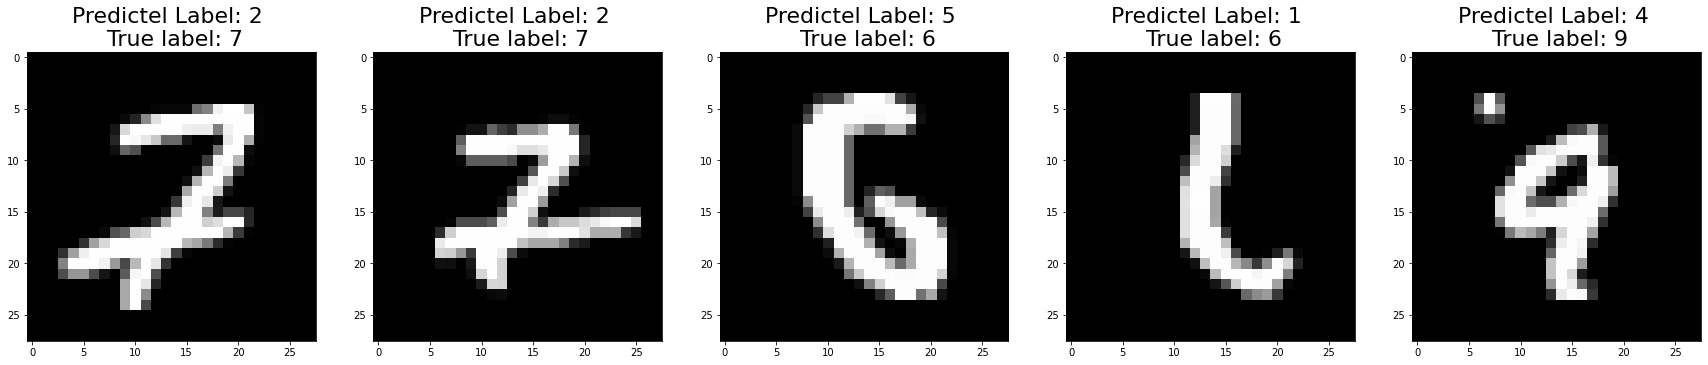

In [ ]:
#show top erros
num=len(top_idx_diff_errors)
f, ax= plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx=top_idx_diff_errors[i]
  sample=x_test_errors[idx].reshape(28,28)
  y_t= y_true_errors[idx]
  y_p= y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predictel Label: {} \n True label: {}".format(y_p, y_t), fontsize=22)